# Etiquetado morfológico (_PoS-tagging_)

En este cuaderno vamos a hacer etiquetado morfológico (o _PoS-tagging_) en inglés. Primero veremos cómo se hace en un solo corpus y después compararemos visualmente los resultados con otros corpus. Veremos otras pequeñas funciones para explorar un corpus. Aprenderemos el concepto de frecuencias normalizadas y por qué son importantes en PLN.

[¿PoS? WTF](http://138.201.254.242:8000/user/leticia/notebooks/PoS-tagging.ipynb#¿PoS?-WTF)

[_PoS-tagging_ de un corpus](http://138.201.254.242:8000/user/leticia/notebooks/PoS-tagging.ipynb#PoS-tagging-de-un-corpus)

1. [Abrir un corpus y almacenar su contenido](http://138.201.254.242:8000/user/leticia/notebooks/PoS-tagging.ipynb#1.-Abrir-un-corpus-y-almacenar-su-contenido)

2. [Tokenizar el texto](http://138.201.254.242:8000/user/leticia/notebooks/PoS-tagging.ipynb#2.-Tokenizar-el-texto)

3. [_PoS-tagging_](http://138.201.254.242:8000/user/leticia/notebooks/PoS-tagging.ipynb#3.-PoS-tagging)

    [Contar una determinada PoS](http://138.201.254.242:8000/user/leticia/notebooks/PoS-tagging.ipynb#Contar-una-determinada-PoS)

[Otras funciones de NLTK que podemos aplicar a un corpus](http://138.201.254.242:8000/user/leticia/notebooks/PoS-tagging.ipynb#Otras-funciones-de-NLTK-que-podemos-aplicar-a-un-corpus)

[Comparar PoSes de distintos corpus](http://138.201.254.242:8000/user/leticia/notebooks/PoS-tagging.ipynb#Comparar-PoSes-de-distintos-corpus)

- [Comparar formas y lemas totales](http://138.201.254.242:8000/user/leticia/notebooks/PoS-tagging.ipynb#Comparar-formas-y-lemas-totales)

- [Comparar formas y lemas normalizados](http://138.201.254.242:8000/user/leticia/notebooks/PoS-tagging.ipynb#Comparar-formas-y-lemas-normalizados)

[Ejercicios](http://138.201.254.242:8000/user/leticia/notebooks/PoS-tagging.ipynb#Ejercicios)

[Referencias](http://138.201.254.242:8000/user/leticia/notebooks/PoS-tagging.ipynb#Referencias)

## ¿PoS? WTF

Antes de nada, ¿qué es eso del etiquetado morfológico? ¿Qué es una PoS?

Nos referimos básicamente a los tipos de palabras que hay: nombres, adjetivos, verbos, preposiciones, pronombres, adverbios, conjunciones... Probablemente en el instituto te hayan hablado de ello como "categorías gramaticales", pero otra forma de llamarlos es "partes del discurso", y eso es exactamente lo que significa _PoS_ en inglés, _part of speech_.

PoS-tagging vendría a ser, por tanto, dar a cada palabra de un texto ese "metadato" sobre su naturaleza gramatical, normalmente convirtiendo una lista de palabras en una lista de parejas (o _duplas_, como dicen los informáticos) de palabra-PoS.

## _PoS-tagging_ de un corpus
Si nunca has programado antes, es importante que, antes de seguir, entiendas el concepto de [variable](https://www.tutorialspoint.com/python/python_variable_types.htm) y sepas lo que es un [comentario](https://learnpythonthehardway.org/book/ex2.html).

### 1. Abrir un corpus y almacenar su contenido
El texto con el que vamos a trabajar se encuentra en el archivo austen-emma.txt en el directorio nltk_data/corpora/gutenberg.

Antes de nada, tenemos que extraer todo el texto contenido en el archivo para poder procesarlo con Python.

En la variable _f_ vamos a almacenar el archivo de texto, y en la variable _raw_, el contenido de ese archivo.
Podemos imprimir los primeros 300 caracteres de _raw_ para comprobar qué hay en esa variable.

In [15]:
f = open("nltk_data/corpora/gutenberg/austen-emma.txt", "r")
raw = f.read()
#f.close()

print(raw[:300])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was t


### 2. Tokenizar el texto

Llamamos "tokenizar" a separar el texto en palabras. En realidad, estamos partiendo en trozos y considerando "tokens" todo aquello que esté separado por espacios, es decir, todo lo que no son espacios. ¿Y qué hacemos con esos trozos? Los estamos metiendo en una [lista](https://www.tutorialspoint.com/python/python_lists.htm).

¿Por qué hace falta tokenizar el texto antes de hacer el etiquetado? Porque si le pasamos el texto en crudo para que nos devuelva las PoSes, intentará sacar la PoS de cada carácter.

En primer lugar importamos el paquete de NLTK y después los módulos que vamos a utilizar. Si no hacemos este paso no podremos usar las funciones que nos interesan de esos módulos.

A continuación solo tenemos que usar la función *word_tokenize* sobre la variable en que habíamos guardado el texto en crudo (_raw_) para que nos devuelva la lista de palabras. Guardamos esa lista en la variable _tokens_.

Podemos imprimir los primeros tokens para ver que todo ha salido bien y también podemos ver cuántos hay en total usando la función _len_ (que te devuelve lo larga que es la variable que le pases como argumento).

In [16]:
import nltk
from nltk import word_tokenize, pos_tag

tokens = word_tokenize(raw)

print(tokens[:60])
print(len(tokens))

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.', 'She', 'was']
191673


### 3. _PoS-tagging_
La función *nltk.pos_tag* es ya la que nos devuelve la PoS de cada palabra.

Fíjate en el valor que ha creado al lado de cada palabra; se deduce enseguida a qué corresponden, pero también puedes consultar la [lista de equivalencias completa](https://stackoverflow.com/a/38264311).

In [3]:
tagged = nltk.pos_tag(tokens)

print(tagged[:100])

[('[', 'NNS'), ('Emma', 'NNP'), ('by', 'IN'), ('Jane', 'NNP'), ('Austen', 'NNP'), ('1816', 'CD'), (']', 'NNP'), ('VOLUME', 'NNP'), ('I', 'PRP'), ('CHAPTER', 'VBP'), ('I', 'PRP'), ('Emma', 'NNP'), ('Woodhouse', 'NNP'), (',', ','), ('handsome', 'NN'), (',', ','), ('clever', 'NN'), (',', ','), ('and', 'CC'), ('rich', 'JJ'), (',', ','), ('with', 'IN'), ('a', 'DT'), ('comfortable', 'JJ'), ('home', 'NN'), ('and', 'CC'), ('happy', 'JJ'), ('disposition', 'NN'), (',', ','), ('seemed', 'VBD'), ('to', 'TO'), ('unite', 'VB'), ('some', 'DT'), ('of', 'IN'), ('the', 'DT'), ('best', 'JJS'), ('blessings', 'NNS'), ('of', 'IN'), ('existence', 'NN'), (';', ':'), ('and', 'CC'), ('had', 'VBD'), ('lived', 'VBN'), ('nearly', 'RB'), ('twenty-one', 'CD'), ('years', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('world', 'NN'), ('with', 'IN'), ('very', 'RB'), ('little', 'JJ'), ('to', 'TO'), ('distress', 'VB'), ('or', 'CC'), ('vex', 'VB'), ('her', 'PRP'), ('.', '.'), ('She', 'PRP'), ('was', 'VBD'), ('the', 'DT'), ('younge

Podemos ver qué PoSes distintas contiene el libro y cuántas son.

Para ello creamos un bucle _for_, que sirve para iterar sobre una lista. Por ejemplo ahora le estamos diciendo que para cada elemento que encuentre en la lista _tagged_, elemento que hemos llamado _dupla_ como lo podíamos haber llamado de cualquier otra forma, queremos que tome el segundo valor (en Python se empieza a contar desde el 0) y lo añada a la variable _PoSes_ que hemos creado un par de líneas antes.

Después, con la función _set_, estamos eligiendo solo los valores distintos que hay dentro de _PoSes_. Podemos imprimirlo y podemos imprimir su longitud (con _len_) para ver cuáles y cuántas son las PoSes que aparecen en el libro.

In [17]:
PoSes = []

for dupla in tagged:
    PoSes.append(dupla[1])

PoSes = set(PoSes)

print(PoSes)
print(len(PoSes))

{'NNP', 'VBZ', 'PRP', "''", 'WDT', 'EX', 'RBR', 'UH', 'PRP$', 'VBG', 'WP', 'JJ', 'DT', 'VBD', 'JJR', '$', 'CD', 'IN', ':', '``', 'POS', 'RBS', 'RB', 'WRB', '(', 'CC', 'NNS', 'VBP', 'MD', 'NNPS', 'FW', 'TO', '.', 'PDT', 'NN', 'JJS', ')', ',', 'RP', 'WP$', 'VB', 'VBN'}
42


### Contar una determinada PoS

Saber las PoSes de un corpus puede servir para discriminar por PoSes, es decir, ver cuáles son todos los nombres, verbos, adjetivos, adverbios... Estas cuatro categorías, especialmente, nos van a dar una buena idea del léxico (es decir, el [campo semántico](https://es.wikipedia.org/wiki/Campo_sem%C3%A1ntico)) utilizado en cada corpus que tratemos, porque son las categorías que llevan, en mayor parte, la carga semántica. Compara las oraciones:

1. El médico operaba en su quirófano desinfectado.
2. El jardinero podaba en su jardín floreciente.

En el ámbito médico no esperamos encontrar palabras como _jardinero_, _podar_, _jardín_ o _floreciente_, y en un texto sobre jardinería no encontraríamos los nombres, verbos, adjetivos o adverbios como los de la oración (1). ¡Sin embargo, el resto de las palabras las comparten!

Es curioso que esta distinción coincida con la que separa entre lo que los lingüistas llamamos _categorías abiertas_ y _cerradas_. Las categorías abiertas son relativamente fáciles de ampliar: creamos constantemente nuevos nombres y adjetivos, pero el proceso de creación de una nueva conjunción, por ejemplo, es mucho más largo.

Vamos a fijarnos, por tanto, en dos categorías con mucha carga semántica, como son los nombres y los verbos.

Por cada elemento que hay en nuestra variable _tagged_ vamos a fijarnos en el segundo elemento (lo que indicamos con tupla[1]). Solo nos interesa cuando mide más de un carácter, así que ponemos esa condición con _if_ para seguir avanzando. Si además los dos primeros elementos de la tupla (es decir, los dos primeros caracteres) coinciden con "NN", entonces nos sigue interesando. Entonces le ordenamos al programa que en ese caso, el primer elemento de la tupla lo vaya anexando a la variable _nombres_ (que hemos declarado anteriormente como lista).

Después, es sencillo imprimir un mensaje jugando con los atributos de esa lista.

In [5]:
nombres = []

for tupla in tagged:
    if len(tupla[1]) > 1:
        if tupla[1][:2] == 'NN':
            nombres.append(tupla[0])

title = "Emma"
            
print("Hay", len(nombres), "nombres en total en", title, ", de los cuales", len(set(nombres)),
      "son distintos. Estos son los 50 primeros:")
print(nombres[:50])

Hay 32070 nombres en total en Emma , de los cuales 4515 son distintos. Estos son los 50 primeros:
['[', 'Emma', 'Jane', 'Austen', ']', 'VOLUME', 'Emma', 'Woodhouse', 'handsome', 'clever', 'home', 'disposition', 'blessings', 'existence', 'years', 'world', 'daughters', 'father', 'consequence', 'sister', 'marriage', 'mistress', 'house', 'period', 'mother', 'remembrance', 'caresses', 'place', 'woman', 'governess', 'mother', 'affection', 'years', 'Miss', 'Taylor', 'Mr.', 'Woodhouse', 'family', 'governess', 'friend', 'fond', 'daughters', 'Emma', 'Between', 'intimacy', 'sisters', 'Miss', 'Taylor', 'office', 'governess']


Y así podemos sacar cualquier PoS, es cuestión de dar con la regla que nos permita cazar cada ejemplar.

In [6]:
verbos = []

for tupla in tagged:
    if len(tupla[1]) > 1:
        if tupla[1][:1] == 'V':
            verbos.append(tupla[0])

print("Hay", len(verbos), "verbos en total en", title, ", de los cuales", len(set(verbos)),
      "son distintos. Estos son los 50 primeros:")
print(verbos[:50])

Hay 31358 verbos en total en Emma , de los cuales 2885 son distintos. Estos son los 50 primeros:
['CHAPTER', 'seemed', 'unite', 'had', 'lived', 'distress', 'vex', 'was', 'had', 'been', 'had', 'died', 'have', 'had', 'been', 'supplied', 'had', 'fallen', 'had', 'been', '_them_', 'was', 'had', 'ceased', 'hold', 'had', 'allowed', 'impose', 'being', 'passed', 'had', 'been', 'living', 'friend', 'attached', 'doing', 'liked', 'esteeming', 'directed', 'were', 'having', 'think', 'were', 'threatened', 'was', 'did', 'came', 'married', 'was', 'brought']


## Otras funciones de NLTK que podemos aplicar a un corpus

Si importamos Text, podemos convertir el texto tokenizado en un objeto de texto explorable a través de interfaces sencillas. Se puede pintar un gráfico de dispersión para ver cómo está repartida una palabra en un texto, sacar palabras que comparten contextos con la palabra dada, visualizar la cantidad de concordancias que queramos...

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


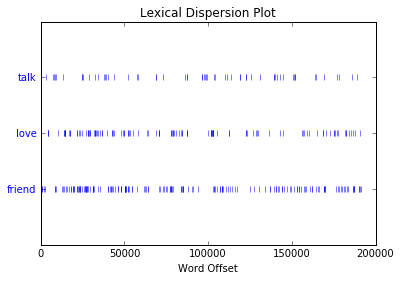

she he you i her there him what harriet that emma this weston them
elton they and me herself all
Displaying 20 of 1970 matches:
r her . The want of Miss Taylor would be felt every hour of every day . She re
 ; but Emma was aware that great must be the difference between a Mrs. Weston 
ong October and November evening must be struggled through at Hartfield , befo
il , but not one among them who could be accepted in lieu of Miss Taylor for e
ther awoke , and made it necessary to be cheerful . His spirits required suppo
 , my dear . '' `` How often we shall be going to see them , and they coming t
d they coming to see us ! -- We shall be always meeting ! _We_ must begin ; we
ing . We must go in the carriage , to be sure . '' `` The carriage ! But James
; -- and where are the poor horses to be while we are paying our visit ? '' ``
 paying our visit ? '' `` They are to be put into Mr. Weston 's stable , papa 
st night . And as for James , you may be very sure he will always like going t
d n

In [7]:
from nltk import Text

tokens = Text(tokens)

tokens.dispersion_plot(["talk", "love", "friend"])

tokens.similar("it")

tokens.concordance("be", lines=20)

## Comparar PoSes de distintos corpus

Ahora vamos a aplicar todo lo que hemos aprendido hasta ahora en distintos corpus a la vez. (A partir de aquí no vamos a aprender nuevas funcionalidades de NLTK, pero sí de Python; vamos a explorar corpus con los datos que ahora sabemos extraer de ellos.)

Para ello nos va a ser muy útil definir funciones. En Python (y en la mayoría de lenguajes de programación) no solo se pueden usar las funciones del sistema o de las librerías que importemos, sino que podemos crear nuestras propias funciones con _def_ e indicando a continuación qué pasos debe seguir esa función. [Más instrucciones sobre funciones](https://www.tutorialspoint.com/python/python_functions.htm).

Lo primero que vamos a hacer es una función que aplique los pasos del 1 al 3 que hemos hecho antes con un corpus. Así, solo tendremos que llamarla y pasarle el argumento que apunte al corpus que queramos para que nos devuelva directamente la lista de palabras-PoSes. Por eso la hemos llamado directamente _tag_.

In [19]:
def tag(filename):
    f = open(filename, "r")
    raw = f.read()
    f.close()
    tokens = word_tokenize(raw)
    tagged = nltk.pos_tag(tokens)
    return tagged

Después, tiene sentido crear distintas funciones para contar distintas PoSes. De nuevo recuperamos las condiciones que pusimos antes para obtener nombres y verbos. Vamos a hacer que nos devuelva dos valores: el del número total de formas nominales/verbales que aparecen en el texto y el del número total de formas **distintas** que aparecen.

In [20]:
def count_nouns(tagged_text):
    nouns = []
    for tupla in tagged_text:
        if len(tupla[1]) > 1:
            if tupla[1][:2] == 'NN':
                nouns.append(tupla[0])
    return len(nouns), len(set(nouns))

def count_verbs(tagged_text):
    verbs = []
    for tupla in tagged_text:
        if tupla[1][:1] == 'V':
            verbs.append(tupla[0])
    return len(verbs), len(set(verbs))

Ahora simplemente vamos a hacer una lista manejable con los corpus que vamos a querer comparar. Guardamos en cada variable el sitio en que está el archivo de texto, para solo tener que usarlo una vez, y después creamos la lista con todos ellos.

In [10]:
Emma = "nltk_data/corpora/gutenberg/austen-emma.txt" # "Emma", de Jane Austen
Persuasion = "nltk_data/corpora/gutenberg/austen-persuasion.txt" # "Persuasión", de Jane Austen
Sense = "nltk_data/corpora/gutenberg/austen-sense.txt" # "Sentido y sensibilidad", de Jane Austen
Caesar = "nltk_data/corpora/gutenberg/shakespeare-caesar.txt" # "Julius Caesar", de Shakespeare
Hamlet = "nltk_data/corpora/gutenberg/shakespeare-hamlet.txt" # "Hamlet", de Shakespeare
Macbeth = "nltk_data/corpora/gutenberg/shakespeare-macbeth.txt" # "Macbeth", de Shakespeare
Alice = "nltk_data/corpora/gutenberg/carroll-alice.txt" # "Alicia en el país de las maravillas", de Lewis Carroll
Paradise = "nltk_data/corpora/gutenberg/milton-paradise.txt" # "El paraíso perdido", de John Milton
Leaves = "nltk_data/corpora/gutenberg/whitman-leaves.txt" # "Hojas de hierba", de Walt Whitman
Bible = "nltk_data/corpora/gutenberg/bible-kjv.txt" # La Biblia, versión de King James
Dorian = "data/corpus_misc/en/literature/The Picture of Dorian Gray.txt" # "El retrato de Dorian Grey", de Oscar Wilde
Ulysses = "data/corpus_misc/en/literature/Ulysses.txt" # "Ulises", de James Joyce
Dracula = "data/corpus_misc/en/literature/Dracula.txt" # "Drácula", de Bram Stoker
Metamorphosis = "data/corpus_misc/en/literature/Metamorphosis.txt" # "Metamorfosis", de Franz Kafka
Friends = "data/corpus_misc/en/subtitles/Friends/friends.txt" # Las diez temporadas de la serie de TV "Friends"

books = [Emma, Persuasion, Sense, Caesar, Hamlet, Macbeth, Alice,
         Paradise, Leaves, Bible, Dorian, Ulysses, Dracula, Metamorphosis, Friends]

Finalmente, creamos una función de funciones (¡que acabamos de crear nosotros!). Como le estamos diciendo que nos devuelva dos valores, que a su vez son dobles, lo que nos devuelva serán 4 valores, guardados en una lista de dos duplas.

In [21]:
def count(book):
    book = tag(book)
    nouns = count_nouns(book)
    verbs = count_verbs(book)     
    return [nouns, verbs]    

Vamos a probar si ha funcionado todo esto probando con algunos corpus. Puedes elegir los que quieras de la lista de arriba y sustituirlos para ver cuántos nombres y verbos salen en cada uno. Vemos que, en general, salen más nombres que verbos.

In [22]:
print(count(Emma))
print(count(Persuasion))
print(count(Sense))
print(count(Bible))
print(count(Metamorphosis))

[(32070, 4515), (31358, 2885)]
[(17545, 3106), (16036, 2134)]
[(24302, 3527), (22285, 2563)]
[(202437, 10226), (126415, 4353)]
[(5198, 1498), (4825, 1098)]


### Comparar formas y lemas totales
Ahora tenemos que decidir qué comparar. No tiene sentido comparar apariciones totales de una misma PoS con apariciones únicas de otra; tendremos que comparar valores que representen lo mismo para cada corpus. Por tanto, tenemos que reordenar un poco estas listas que tenemos ahora.

Vamos a llamar, por abreviar, _formas_ a las apariciones totales de nombres o verbos y _lemas_ a las apariciones únicas. Pero tengamos en cuenta que no es exactamente así: estaremos contando como lemas distintos cosas como "woman" y "women", cuando en realidad pertenecen al mismo lema. Pero para ver cómo funciona nos da una aproximación suficientemente ilustrativa (consolémonos con que en inglés no hay muchas formas por lema; el desajuste sería bastante más desastroso en otros idiomas).

Nos interesa tener, por un lado, una lista de formas (nominales y verbales) y, por otro, una lista de lemas. Así luego podremos pintar solo las formas y solo los lemas.

In [13]:
def reordenar(counts):
    formas = []
    lemas = []
    for value in counts:
        formas.append(value[0])
        lemas.append(value[1])
    return formas, lemas

Ahora sacamos la lista de formas y la lista de lemas para cada libro. La siguiente celda tardará unos minutos en ejecutarse cada vez.

In [23]:
formas = []
lemas = []

for book in books:
    formas.append(reordenar(count(book))[0])
    lemas.append(reordenar(count(book))[1])

Ahora, ¡a pintar! Para ello vamos a usar la librería [MatPlotLib](https://matplotlib.org/users/pyplot_tutorial.html).

Empezamos comparando solo las formas totales. Esperamos que, si hay algún libro de mucha más extensión que los demás, haya una gran diferencia porque, recuerda, estamos contando apariciones totales de nombres y verbos.

In [ ]:
import matplotlib.pyplot as plt

booknames = ['Emma', 'Persuasion', 'Sense', 'Caesar', 'Hamlet', 'Macbeth', 'Alice',
         'Paradise', 'Leaves', 'Bible', 'Dorian', 'Ulysses', 'Dracula', 'Metamorphosis', 'Friends']

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
n = []
v = []

for forma in formas:
    n.append(forma[0])
    
for forma in formas:
    v.append(forma[1])

plt.plot(x, n)
plt.plot(x, v)
plt.axis([0, 16, 0, 225000])
plt.title('Nombres y verbos en obras en inglés - formas (sin normalizar)')
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, booknames, rotation = 'vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.1)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom = 0.15)
plt.show()

¡En _Alicia en el país de las maravillas_ se usan en total más formas verbales que nominales! Puedes cambiarle la longitud del eje *y* para comprobarlo. Prueba a ponerlo a 20 000.

Como ves, hay mucha disparidad entre obras. La Biblia, el _Ulises_ o las diez temporadas de _Friends_ son muy extensas, por tanto es lógico que contengan más formas que las demás.

Ahora vamos a contar las formas únicas totales. Como no son todas las apariciones, sino que cada vez que aparezca una misma forma se va a contar como 1, esperamos que la gráfica se suavice. Esto nos puede dar una idea de la cantidad de vocabulario nominal y verbal que maneja cada autor con un poco más de rigor: demuestras que conoces una palabra tanto cuando la usas una vez como cuando la usas mil.

Pero aún tenemos que pasarle el filtro de normalización para que no tengan ventaja los textos más largos: vas a poder demostrar, con más ventaja frente a otros, que sabes muchos nombres y verbos si te dan más tiempo para hablar que los demás.

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
n = []
v = []

for lema in lemas:
    n.append(lema[0])
    
for lema in lemas:
    v.append(lema[1])

plt.plot(x, n)
plt.plot(x, v)
plt.axis([0, 16, 0, 26000])
plt.title('Nombres y verbos en obras en inglés - lemas (sin normalizar)')
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, booknames, rotation = 'vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.1)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom = 0.15)
plt.show()

### Comparar formas y lemas normalizados

Como ya hemos dicho, en la línea de comparar datos lo más equilibrados posible, no tiene mucho sentido comparar formas ni lemas totales de un corpus de 1000 palabras con los de uno de 20 000. Para analizar la variedad de léxico que hay en una obra u otra, además, no sería justo.

Así que una cosa que podemos hacer es dividir estos datos con los que hemos estado trabajando hasta ahora entre el número de palabras totales de su respectivo corpus. Es decir, la longitud del objeto que contiene el texto. Vamos a definir una función exactamente igual a la que antes definimos como _count_, solo que esta vez dividiendo los datos entre el número total de palabras de su respectivo corpus.

In [ ]:
def normalised_count(book):
    book = tag(book)
    n_nouns = [count_nouns(book)[0]/len(book), count_nouns(book)[1]/len(book)]
    n_verbs = [count_verbs(book)[0]/len(book), count_verbs(book)[1]/len(book)]
    return [n_nouns, n_verbs]

In [ ]:
print(normalised_count(Emma))
print(normalised_count(Persuasion))
print(normalised_count(Sense))
print(normalised_count(Bible))
print(normalised_count(Paradise))

Volvemos a reordenar como antes:

In [ ]:
n_formas = []
n_lemas = []

for book in books:
    n_formas.append(reordenar(normalised_count(book))[0])
    n_lemas.append(reordenar(normalised_count(book))[1])

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
n = []
v = []

for n_forma in n_formas:
    n.append(n_forma[0])
    
for n_forma in n_formas:
    v.append(n_forma[1])

plt.plot(x, n)
plt.plot(x, v)
plt.axis([0, 16, 0.1, 0.31])
plt.title('Nombres y verbos en obras en inglés - formas (valores normalizados)')
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, booknames, rotation = 'vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.1)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom = 0.15)
plt.show()

Esto ya es otra cosa: aquí podemos ver la proporción de formas totales de nombres y verbos en una comparación justa entre corpus.

Se me ocurre que en _Alicia en el país de las maravillas_ y en _Friends_ se usan más verbos que nombres porque hay mucho diálogo. Sí, Shakespeare también es diálogo, pero al fin y al cabo es teatro y está más cerca de la poesía. Los libros de un mismo autor, incluso los de un mismo género, comparten muchos rasgos (y por eso hemos escogido estas obras y no otras): las obras de Jane Austen, _Alicia_, _El retrato de Dorian Gray_, _Dracula_, _La metamorfosis_... son todo novelas y andan a la par en el gráfico (entre 0,15 y 0,20 y sin mucha distancia entre formas nominales y verbales). ¿Qué conclusiones sacas tú?

Ahora hacemos lo mismo, pero con los "lemas". Ahora sí podemos esperar que la gráfica nos muestre la riqueza léxica de cada obra (al menos al nivel al que nos estamos acercando a ello) y veamos qué autor se lució más en sus obras.

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
n = []
v = []

for n_lema in n_lemas:
    n.append(n_lema[0])
    
for n_lema in n_lemas:
    v.append(n_lema[1])

plt.plot(x, n, label = 'Nombres')
plt.plot(x, v, label = 'Verbos')
plt.axis([0, 16, 0, 0.13])
plt.title('Nombres y verbos en obras en inglés - lemas (valores normalizados)')
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, booknames, rotation = 'vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.1)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom = 0.15)
plt.show()

[¡Baia, baia!](https://img.buzzfeed.com/buzzfeed-static/static/2016-03/17/13/campaign_images/webdr11/14-situaciones-perfectas-para-decir-baia-baia-2-17132-1458237439-0_dblbig.jpg) Parece que a la hora de la verdad la Biblia es la que menos riqueza léxica tiene (esto no es necesariamente malo, solo significa que es más monotemática que las demás, lo cual es cierto). _Friends_ le va a la zaga (estos chicos de Nueva York solo hablan de café y de citas románticas) y se erige como campeón en cuanto a riqueza léxica Shakespeare en _Macbeth_ y en _Hamlet_. De nuevo, observamos cómo la poesía va por su lado y la novela por otro...

## Ejercicios
- ¿Te atreves a añadir otra PoS a los gráficos? Otra categoría que debería poder dar mucho juego son los adjetivos ;)
- Pinta gráficos de dispersión de distintos corpus con las mismas palabras
- Saca palabras similares en contexto de una misma palabra en distintos corpus
- Encuentra concordancias de una misma palabra en distintos corpus
- Y sobre todo, ¡piensa qué puede explicar que salgan resultados distintos!

## Referencias
Muchas ideas para este cuaderno han salido del [maravilloso blog del NLP Workgroup de Michael Hemenway](http://nlpworkgroup.postach.io/).

Para hacer _PoS-tagging_ en español está el [genial cuaderno de _PoS-tagging_ de Víctor Peinado](https://github.com/vitojph/kschool-nlp/blob/master/notebooks-py3/pos-tagger-es.ipynb).

Tal vez también te interese leer el [capítulo sobre categorización y etiquetado de palabras del libro de NLTK](http://www.nltk.org/book/ch05.html).

En general, hay muchos cuadernos por la red sobre cualquier tema, en [esta recopilación](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks) hay sobre _text mining_ y PLN.